# Analyzing the dataset

After processing and cleaning the files, the full dataset is loaded to analyze basic information about the traffic before applying machine learning algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import os

file_path = r"CIC-IDS-2017\CSVs\GeneratedLabelledFlows\TrafficLabelling\processed\ids2017_processed.csv"
df = pd.read_csv(file_path)
convert_dict = {'label': 'category'}
df = df.astype(convert_dict)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 96 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   destination_port             int64   
 1   protocol                     int64   
 2   flow_duration                int64   
 3   total_fwd_packets            int64   
 4   total_backward_packets       int64   
 5   total_length_of_fwd_packets  float64 
 6   total_length_of_bwd_packets  float64 
 7   fwd_packet_length_max        float64 
 8   fwd_packet_length_min        float64 
 9   fwd_packet_length_mean       float64 
 10  fwd_packet_length_std        float64 
 11  bwd_packet_length_max        float64 
 12  bwd_packet_length_min        float64 
 13  bwd_packet_length_mean       float64 
 14  bwd_packet_length_std        float64 
 15  flow_bytes_s                 float64 
 16  flow_packets_s               float64 
 17  flow_iat_mean                float64 
 18  flow_iat_std          

,destination_port,protocol,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,...,is_ftppatator,is_sshpatator,is_dos_slowloris,is_dos_slowhttptest,is_bot,is_web_attack_brute_force,is_web_attack_xss,is_infiltration,is_web_attack_sql_injection,is_heartbleed
0,49188,6,4,2,0,12.0,0.0,6.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
1,49188,6,1,2,0,12.0,0.0,6.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,49188,6,1,2,0,12.0,0.0,6.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,49188,6,1,2,0,12.0,0.0,6.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0
4,49486,6,3,2,0,12.0,0.0,6.0,6.0,6.0,...,0,0,0,0,0,0,0,0,0,0


### 1. Benign Network flows vs Attacks

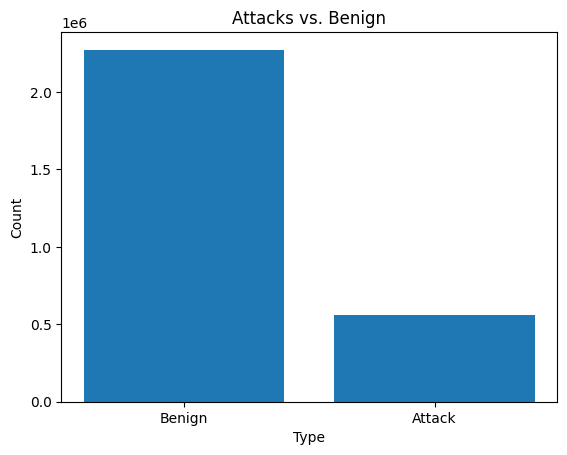

In [2]:
attack_counts = df['is_attack'].value_counts()
plt.bar(attack_counts.index, attack_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Attacks vs. Benign')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Attack'])  # Add custom x-axis labels
plt.show()

In [3]:
attack_percentages = (attack_counts / attack_counts.sum()) * 100

# Create a new DataFrame for the table
table_data = pd.DataFrame({'Type': attack_counts.index, 'Number of Attacks': attack_counts.values, 'Percentage': attack_percentages.values})

# Display the table
table_data

,Type,Number of Attacks,Percentage
0,0,2273097,80.300366
1,1,557646,19.699634


### 2. Plot by the Type of Network Traffic

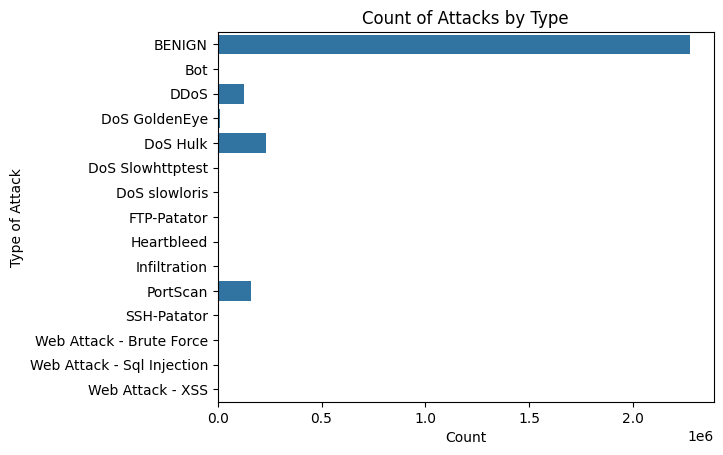

In [5]:
sns.countplot(y='label', data=df)
plt.xlabel('Count')
plt.ylabel('Type of Attack')
plt.title('Count of Attacks by Type')
plt.show()

In [7]:
attack_counts = df['label'].value_counts()
table_data = pd.DataFrame({'Type of Attack': attack_counts.index, 'Number of Attacks': attack_counts.values})
table_data

,Type of Attack,Number of Attacks
0,BENIGN,2273097
1,DoS Hulk,231073
2,PortScan,158930
3,DDoS,128027
4,DoS GoldenEye,10293
5,FTP-Patator,7938
6,SSH-Patator,5897
7,DoS slowloris,5796
8,DoS Slowhttptest,5499
9,Bot,1966


### 3. Correlation Between Features

A heatmap for the correlation matrix of all relevant features is used to visualize groups of highly correlated features.

<Axes: >

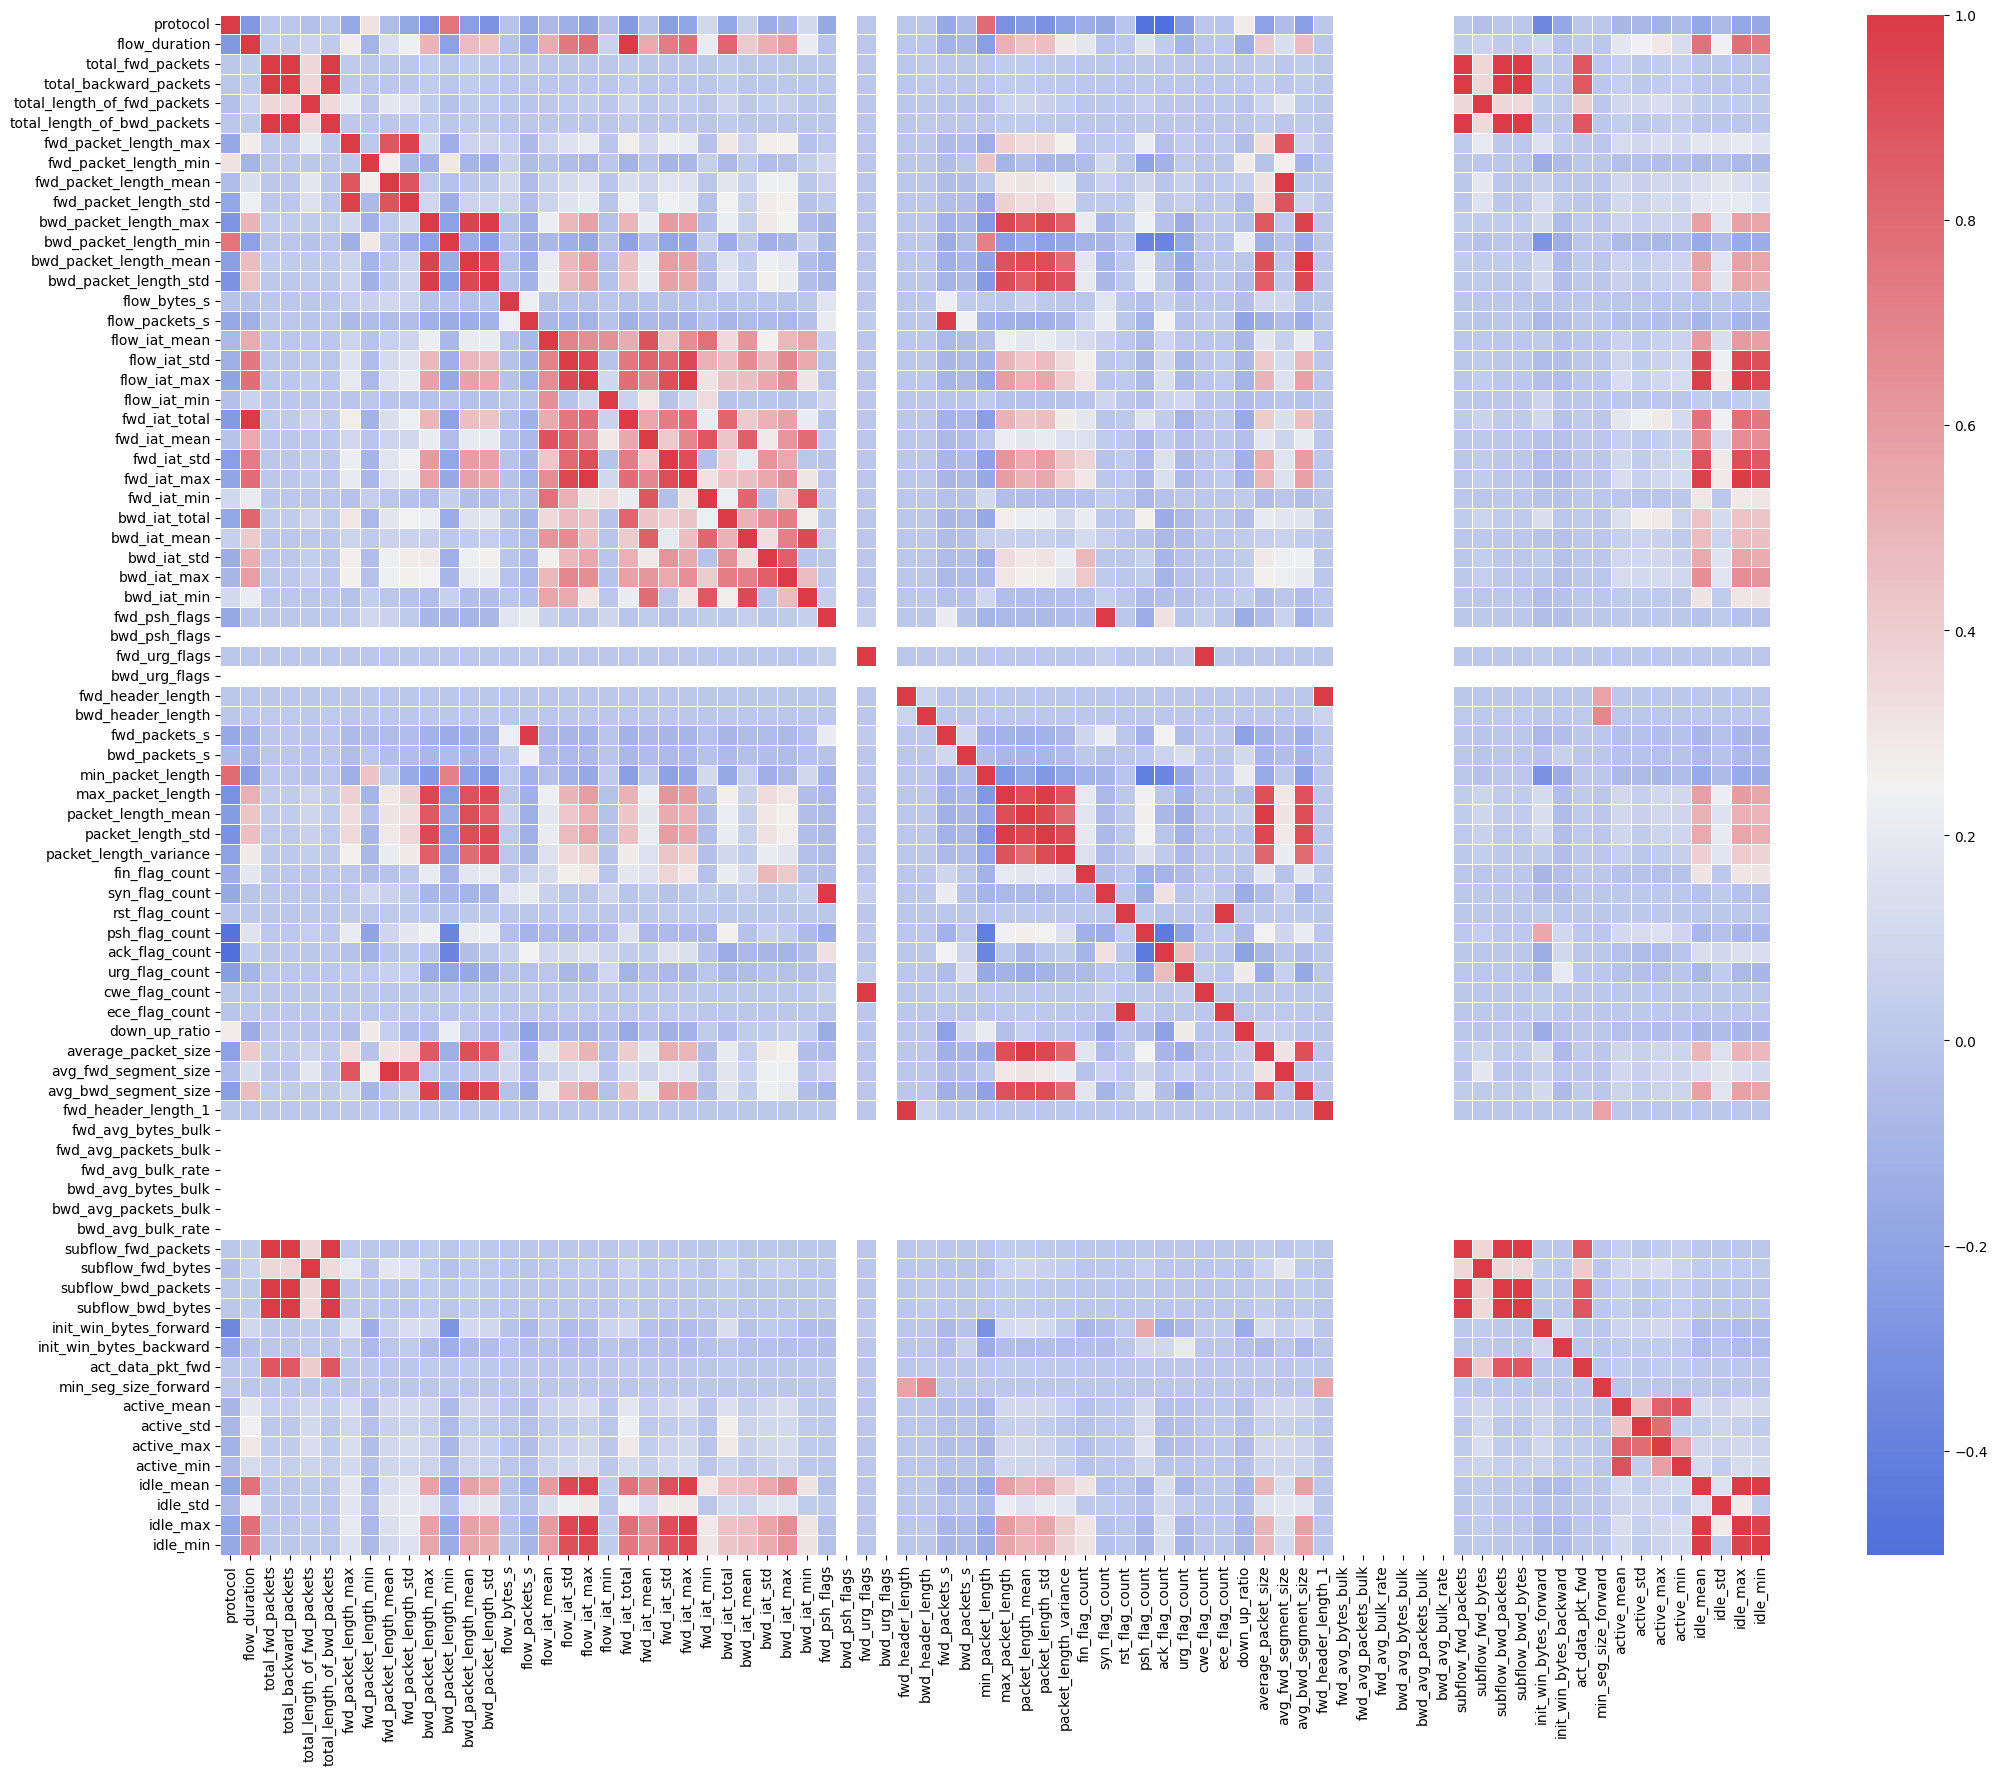

In [16]:
new_df = df.iloc[:, 1:79]
corr = new_df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))

### Conclusion

From this preliminary analysis of the dataset, it can be concluded that the number of benign traffics is much higher than the number of attacks, which will make the machine learning models very heavily skewed towards benign traffics. Some attacks are also very underrepresented, meaning that a binary classifier will be more accurate for detecting certain attacks. Finally, the dataset contains a number of highly correlated features that could be redundant for training machine learning models. Feature engineering must be applied before creating the models.